In [1]:
import os
import json
import numpy as np
import pandas as pd
import plotly.express as px
from PIL import Image
from matplotlib import pyplot as plt
from matplotlib import patches

In [2]:
import sys
current_path = os.path.dirname(os.path.abspath(__name__))
sys.path.append(f'{current_path}/../gmap_traffic_api')


import traffic_color
import importlib
importlib.reload(traffic_color)

from traffic_color import get_df_coord, get_traffic_color, generate_center_list, traffic_map_eval

# var

In [3]:
current_path = os.path.dirname(os.path.abspath(__name__))
file_path = f'{current_path}/../api_result/traffic_api_test'
output_path = f'{current_path}/../db/output_20240911104429.csv'
# output_path = f'{current_path}/../db/output_20240911111759.csv'

nw = (21.049056406663173, 105.77530516209124)
se = (21.003527457057128, 105.81141970388549)

# grid

In [4]:
df_grid = generate_center_list(nw, se, zoom=18)
df_grid.shape

(40, 2)

In [129]:
df_plot = df_grid.copy()
df_plot.loc[len(df_plot)] = nw
df_plot.loc[len(df_plot)] = se

color_scale = [(0, 'orange'), (1,'red')]

fig = px.scatter_mapbox(df_plot, 
                        lat="x", 
                        lon="y", 
                        # hover_name="distance", 
                        # hover_data=['vehicle', 'datetime', 'speed'],
                        # color="Listed",
                        # color_continuous_scale=color_scale,
                        # size='dummy_column_for_size',
                        zoom=8, 
                        height=800,
                        width=800).update_traces(marker={"size": 10})

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

# eval

In [5]:
timestamp_folder = '20240910170225'
traffic_api_result_path = f'{current_path}/../api_result/traffic_api_eval/{timestamp_folder}'

df_coord = get_df_coord(traffic_api_result_path)

In [136]:
# weight = 1
df_eval = traffic_map_eval(output_path, nw, se, df_coord, traffic_api_result_path, num_point_sample=20, random_state=42)
df_eval

,color,predict,actual,tp,precision,recall
2,green,32,140,30.0,93.750000,21.428571
0,yellow,97,23,18.0,18.556701,78.260870
3,red,18,9,NaN,NaN,NaN
1,darkred,39,14,13.0,33.333333,92.857143
4,total,186,186,61.0,32.795699,32.795699


In [134]:
# weight = 0.5
df_eval = traffic_map_eval(output_path, nw, se, df_coord, traffic_api_result_path, num_point_sample=20, random_state=42)
df_eval

,color,predict,actual,tp,precision,recall
0,green,146,140,121,82.876712,86.428571
3,yellow,10,23,1,10.000000,4.347826
2,red,12,9,3,25.000000,33.333333
1,darkred,18,14,10,55.555556,71.428571
4,total,186,186,135,72.580645,72.580645


C:\Users\h\AppData\Local\Temp\ipykernel_11148\2323012912.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_coord_filter['distance'] = np.sqrt((df_coord_filter['lat'] - coord[0]) ** 2 + (df_coord_filter['lng'] - coord[1]) ** 2)


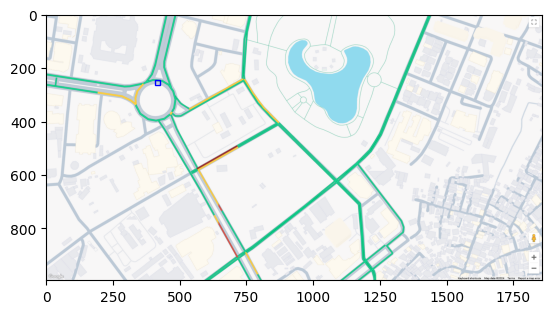

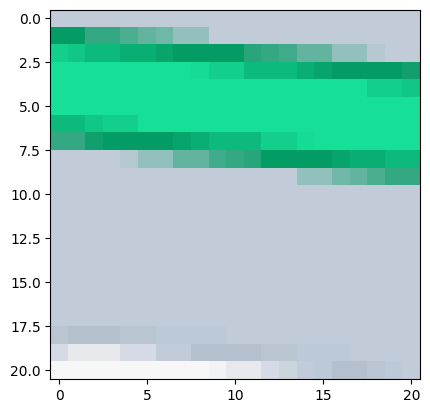

'green'

In [37]:
coord = (21.027867308915678, 105.78750014572006)
get_traffic_color(coord, df_coord, traffic_api_result_path, edge=20, plot=True)